In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Effect of chunk size**

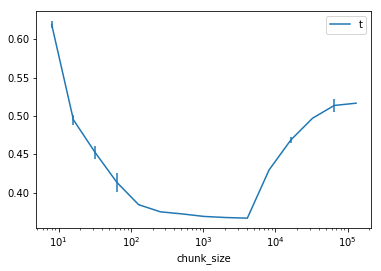

In [80]:
# n_samples = 2**17 = 131072
# n_clusters = 2**10 = 1024
# n_features = 2**7 = 128
# Single thread
# L3 cache size = 56MB
bench_chunk_size_56 = pd.read_csv('./src/bench_chunk_size_1.csv')
bench_chunk_size_56['err'] = bench_chunk_size_56['err'].apply(lambda x: np.sqrt(x))
bench_chunk_size_56.plot(x='chunk_size', y='t', yerr='err', logx=True)
# best ~ 2**12 = 4096
# => chunked pairwise distance matrix ~ 16MB

In [54]:
128 * 4096 * 4 / 1000000

2.097152

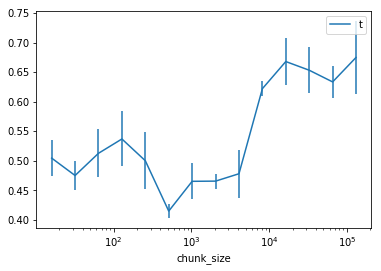

In [81]:
# n_samples = 2**17 = 131072
# n_clusters = 2**10 = 1024
# n_features = 2**7 = 128
# Single thread
# L3 cache size = 4Mo
bench_chunk_size_4 = pd.read_csv('./src/bench_chunk_size_2.csv')
bench_chunk_size_4['err'] = bench_chunk_size_4['err'].apply(lambda x: np.sqrt(x))
bench_chunk_size_4.plot(x='chunk_size', y='t', yerr='err', logx=True)
# best ~ 2**9 = 512
# => chunked pairwise distance matrix ~ 2Mo

Optimal seems to be chunk_size ~ L3 * 2^18 / (n_clusters * 2)

*2 because pairwise distance matrix is not the only allocated memory, and plots shows that it's better to be too much conservative than not enough.

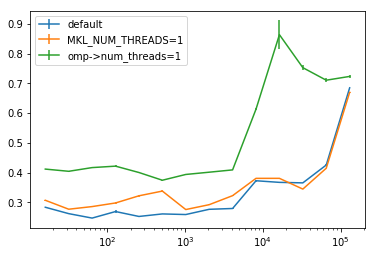

In [78]:
# n_samples = 2**17 = 131072
# n_clusters = 2**10 = 1024
# n_features = 2**7 = 128
# Multithread: 4 threads (2 physical cores)
# L3 cache size = 4Mo  |  L2 cache size = 256ko
bench_chunk_size_multi_4 = pd.read_csv('./src/bench_chunk_size_multi_2.csv')
bench_chunk_size_multi_4_mkl1 = pd.read_csv('./src/bench_chunk_size_multi_2_mkl1.csv')
bench_chunk_size_multi_4_omp1 = pd.read_csv('./src/bench_chunk_size_multi_2_omp1.csv')

fig, ax = plt.subplots()
ax.errorbar('chunk_size',
            't',
            yerr='err',
            data = bench_chunk_size_multi_4)
ax.errorbar('chunk_size',
            't',
            yerr='err',
            data = bench_chunk_size_multi_4_mkl1)
ax.errorbar('chunk_size',
            't',
            yerr='err',
            data = bench_chunk_size_multi_4_omp1)
ax.set_xscale('log')
ax.legend(['default','MKL_NUM_THREADS=1', 'omp->num_threads=1'])
plt.show()

# best ~ 2**6 = 64
# => chunked pairwise distance matrix ~ 0.26Mo